In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline,make_pipeline
import warnings
warnings.simplefilter("ignore")

In [2]:
def wrangle(filename):
    # Read csv file into a pandas dataframe
    df = pd.read_csv(filename)
    return df

In [3]:
df = wrangle('glass.csv')

In [4]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [8]:
X = df.drop(['Id','Type of glass'],axis=1)

In [9]:
corr = X.corr()
corr.style.background_gradient(axis=None)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


### 
- We use the two columns with the highest correlation to build a Clustering Algorithm with Two Features

### CLUSTERING WITH TWO FEATURE

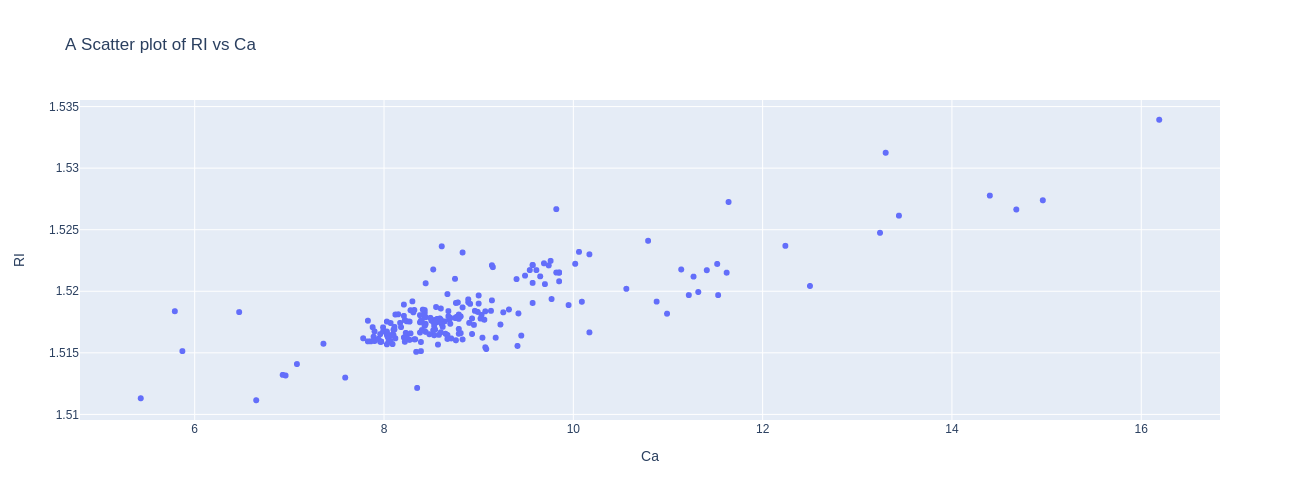

In [10]:
### we use the Ca and RI column with a correlation of 0.81
two_feat = X[['Ca','RI']]
fig = px.scatter(data_frame=two_feat,x='Ca',y='RI',width=1300,title='A Scatter plot of RI vs Ca')
fig.show('png')

#### - We tune the hyper-parameter k to decide the best k cluster to use

In [11]:
inertia = []
ss_score = []
n_clusters = range(2,13)
for cluster in n_clusters:
    model = make_pipeline(StandardScaler(),KMeans(n_clusters=cluster,random_state=42))
    model.fit(two_feat)
    inertia.append(model.named_steps['kmeans'].inertia_)
    ss_score.append(silhouette_score(two_feat,model.named_steps['kmeans'].labels_))

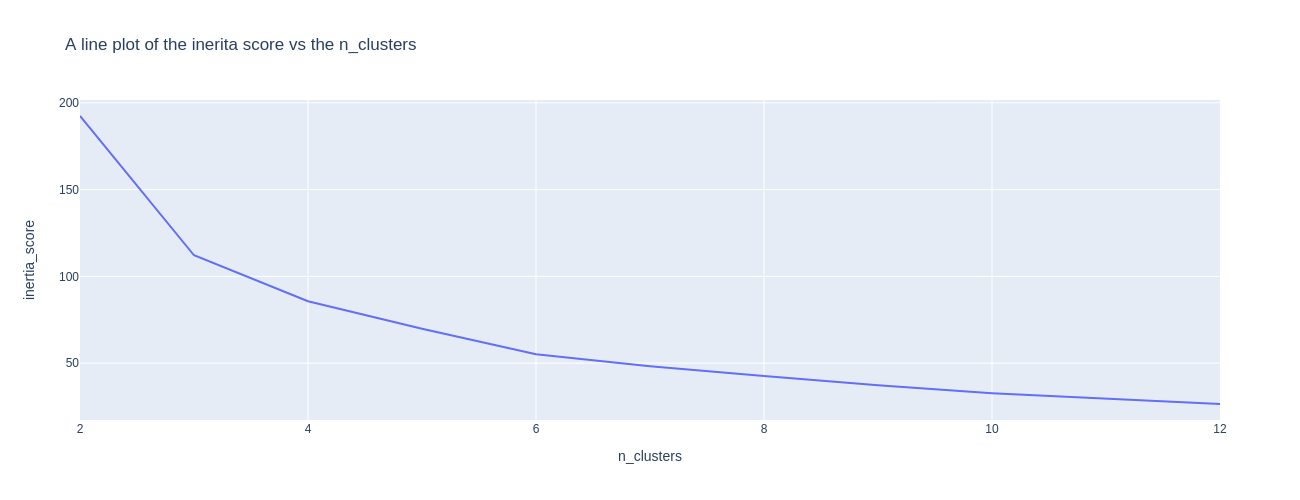

In [12]:
fig = px.line(x=n_clusters,y=inertia,width=1300,labels={'y':'inertia_score','x':'n_clusters'},title='A line plot of the inerita score vs the n_clusters')
fig.show('png')

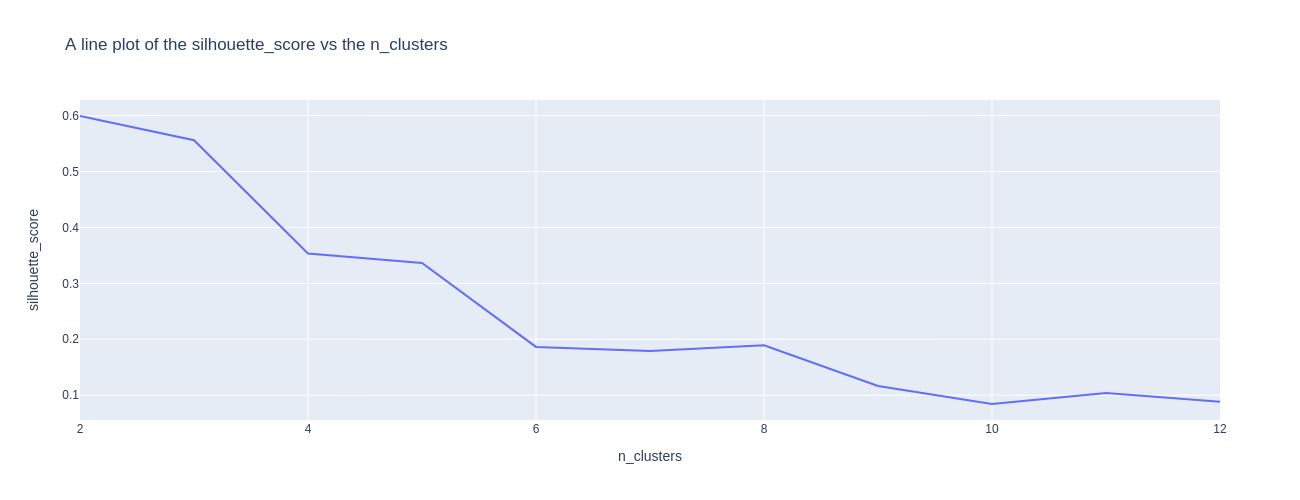

In [13]:
fig = px.line(x=n_clusters,y=ss_score,width=1300,labels={'y':'silhouette_score','x':'n_clusters'},title='A line plot of the silhouette_score vs the n_clusters')
fig.show('png')

#### CONCLUSIONS

- From the above plot the k clusters with the best score is 3, though not a fair result , perhaps using more feature could do a better job.
- We should be expecting a cluster of 6 like the giving number of glasses, so using more feature could help realise that.

In [14]:
scaler = StandardScaler()
scaled_two_feat = scaler.fit_transform(two_feat)
final_model = KMeans(n_clusters = 3,random_state=42)
final_model.fit(scaled_two_feat)

KMeans(n_clusters=3, random_state=42)

In [15]:
label = final_model.labels_
centroid = final_model.cluster_centers_

In [16]:
clustered_two_feat = two_feat.groupby(label).mean()

In [17]:
new_two_feat=pd.DataFrame(scaled_two_feat,columns=['Ca','RI'])
new_two_feat['label'] = label

In [18]:
new_two_feat.head()

,Ca,RI,label
0,-0.145766,0.872868,2
1,-0.793734,-0.249333,0
2,-0.828949,-0.721318,0
3,-0.519052,-0.232831,0
4,-0.624699,-0.312045,0


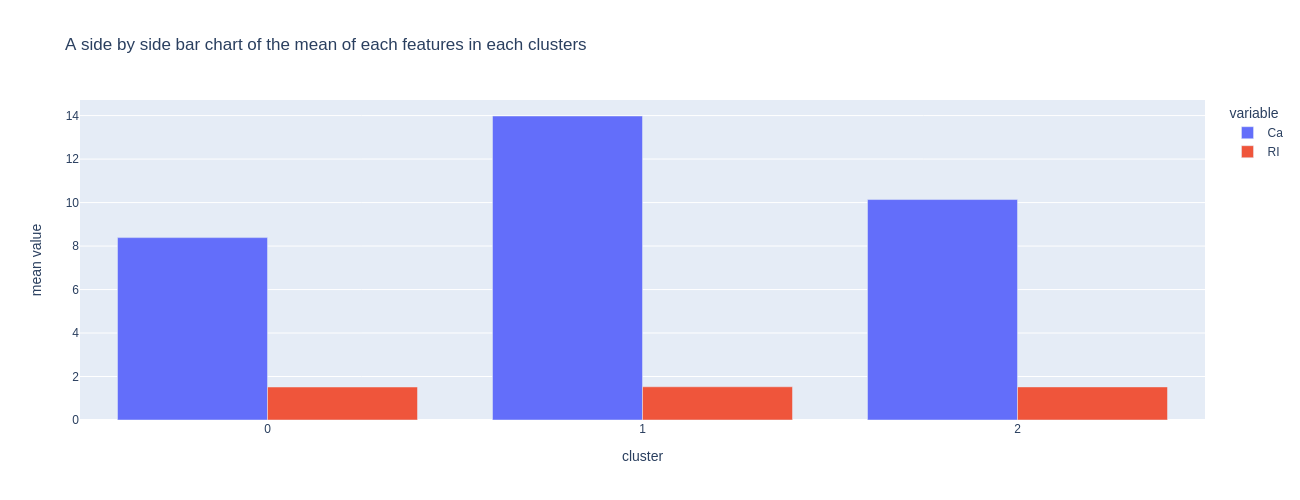

In [19]:
fig = px.bar(clustered_two_feat,barmode='group',width=1300,labels={'index':'cluster','value':'mean value'},title='A side by side bar chart of the mean of each features in each clusters')
fig.show('png')

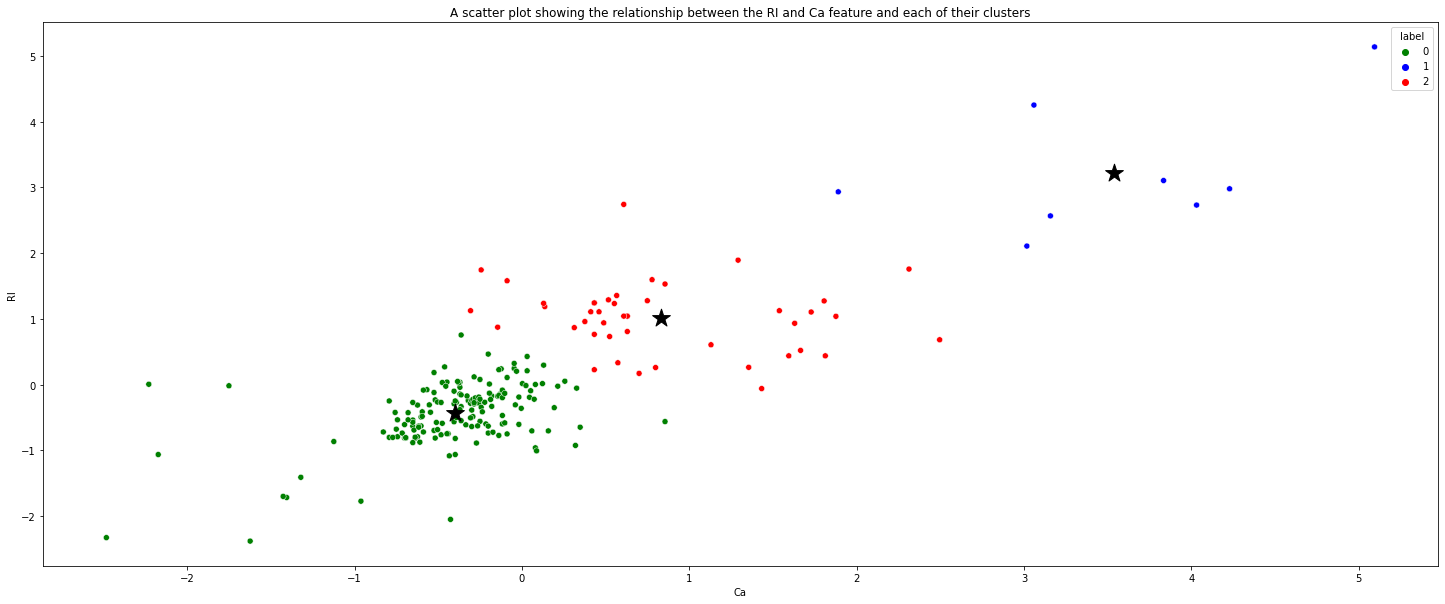

In [20]:
fig,ax = plt.subplots(figsize=(25,10))
sns.scatterplot(data=new_two_feat,x='Ca',y='RI',hue='label',ax=ax,palette=['green','blue','red'])
ax.scatter(centroid[:,0],centroid[:,1],s=350,c='black',marker='*')
plt.title('A scatter plot showing the relationship between the RI and Ca feature and each of their clusters');

### CLUSTERING WITH MULTIPLE FEATURE

In [21]:
# We calculate Variance with the  remaining feature
var_feature = X.var()

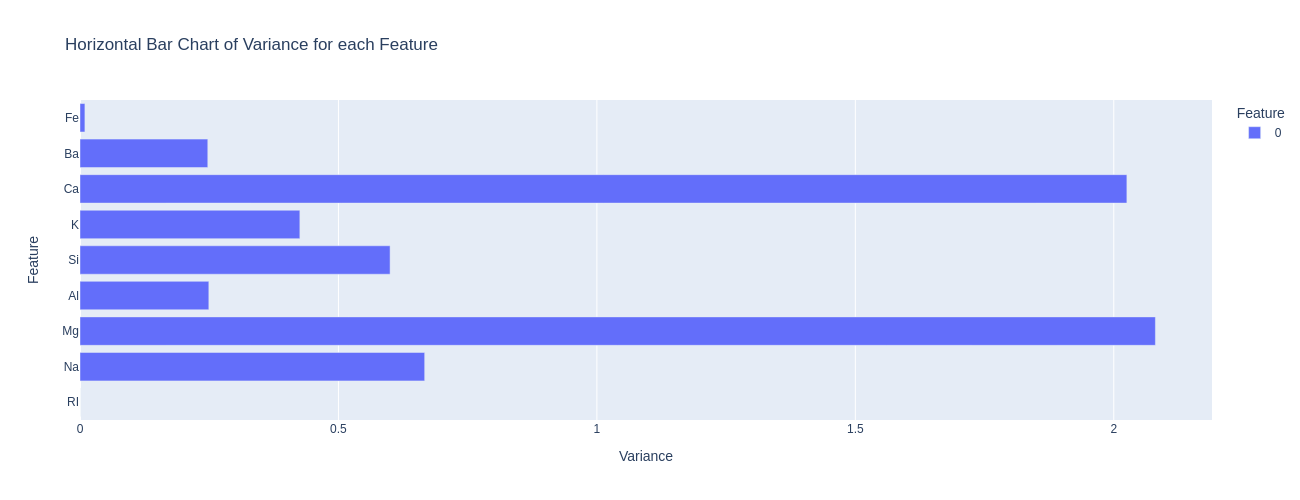

In [22]:
# We create an horizontal barchart to check the variance of each feature
fig = px.bar(var_feature,orientation='h',width=1300,labels={'index':'Feature','value':'Variance','variable':'Feature'},title='Horizontal Bar Chart of Variance for each Feature')
fig.show('png')

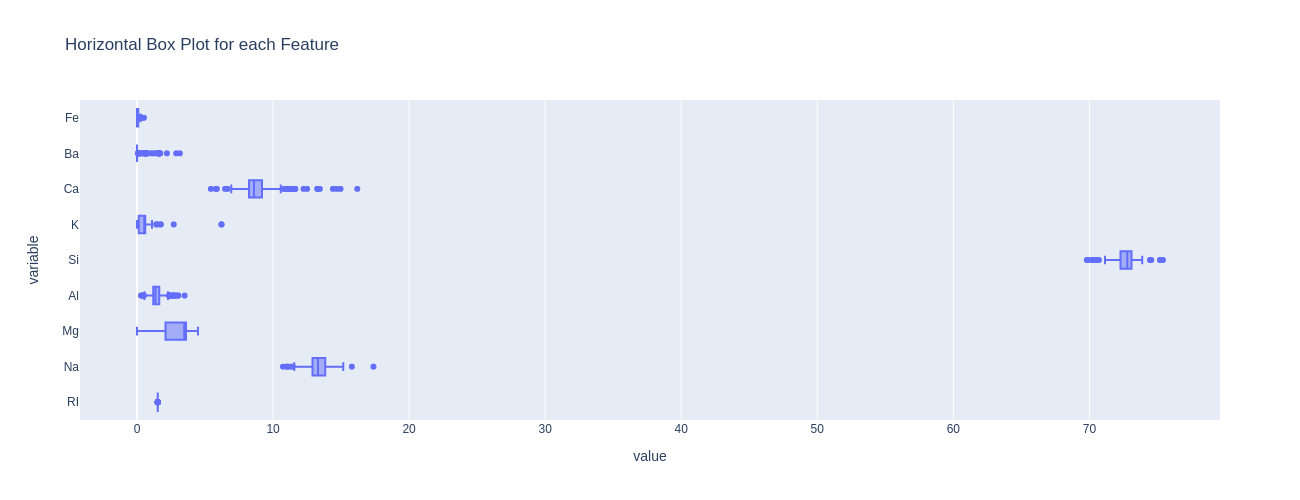

In [23]:
fig = px.box(X,orientation='h',width=1300,labels={'index':'Feature'},title='Horizontal Box Plot for each Feature')
fig.show('png')

In [24]:
X.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

#### - We tune the hyper-parameter k to decide the best k cluster to use

In [25]:
inertia = []
ss_score = []
n_clusters = range(2,13)
for cluster in n_clusters:
    model = make_pipeline(KMeans(n_clusters=cluster,random_state=42))
    model.fit(X)
    inertia.append(model.named_steps['kmeans'].inertia_)
    ss_score.append(silhouette_score(X,model.named_steps['kmeans'].labels_))

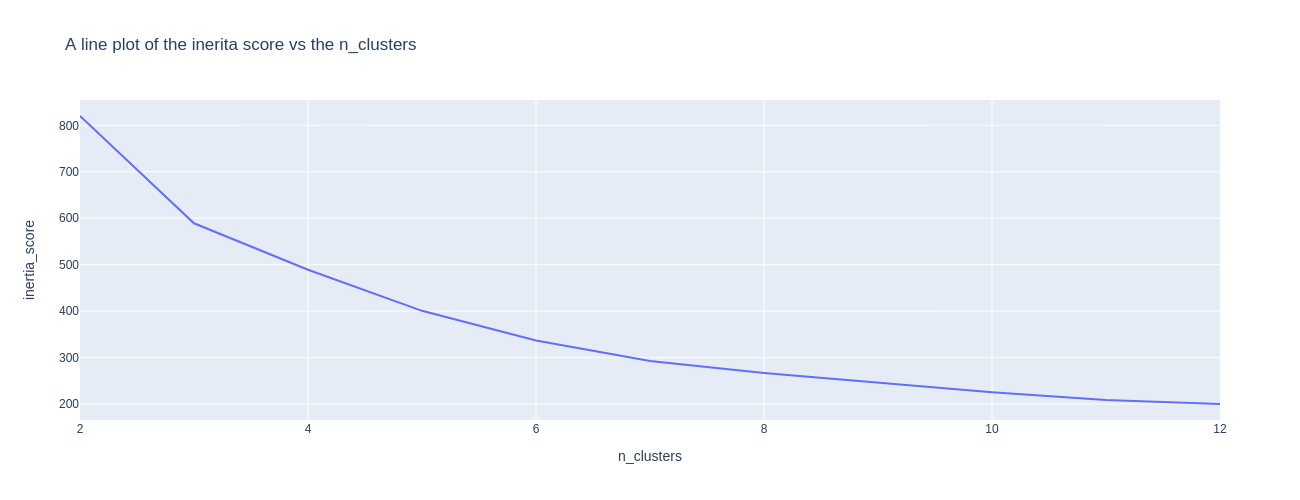

In [26]:
fig = px.line(x=n_clusters,y=inertia,width=1300,labels={'y':'inertia_score','x':'n_clusters'},title='A line plot of the inerita score vs the n_clusters')
fig.show('png')

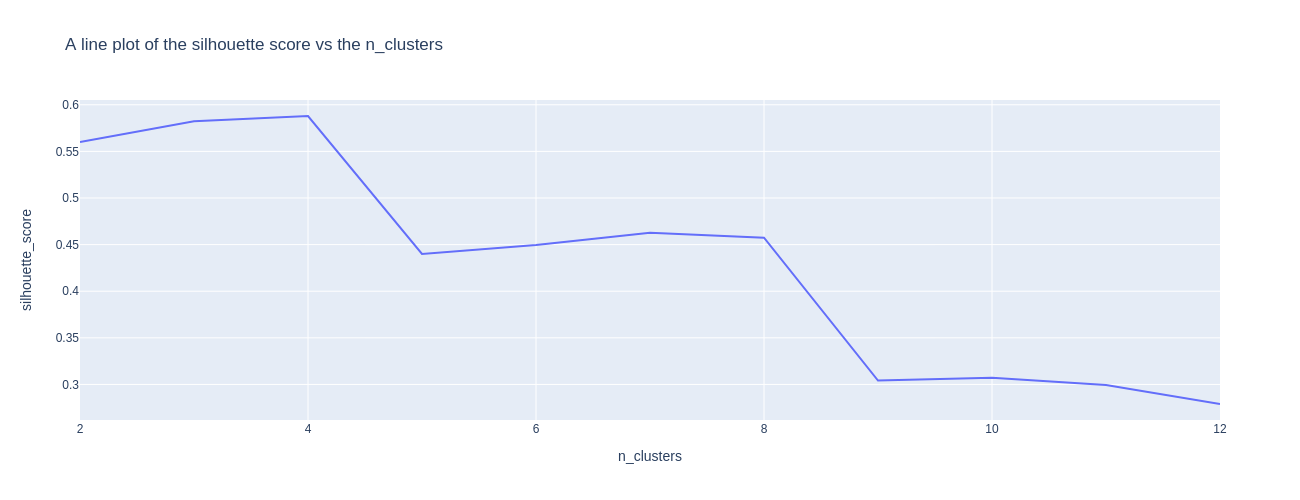

In [27]:
fig = px.line(x=n_clusters,y=ss_score,width=1300,labels={'y':'silhouette_score','x':'n_clusters'},title='A line plot of the silhouette score vs the n_clusters')
fig.show('png')

### Conclusion

- From the above plot the k clusters with the best score is 4, though We should be expecting a cluster of 6 like the given number of types of glasses
- We should build a model for the clusters 4 and 6 and see if we could find a reason for this error.

### Kmeans Model with 4 Clusters

In [28]:
final_model_4 = make_pipeline(StandardScaler(),KMeans(n_clusters = 4,random_state=42))
final_model_4.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [29]:
labels_4 = final_model_4.named_steps['kmeans'].labels_
centroid_4 = final_model_4.named_steps['kmeans'].cluster_centers_

In [30]:
clustered_df_4 = X.groupby(labels_4).mean()

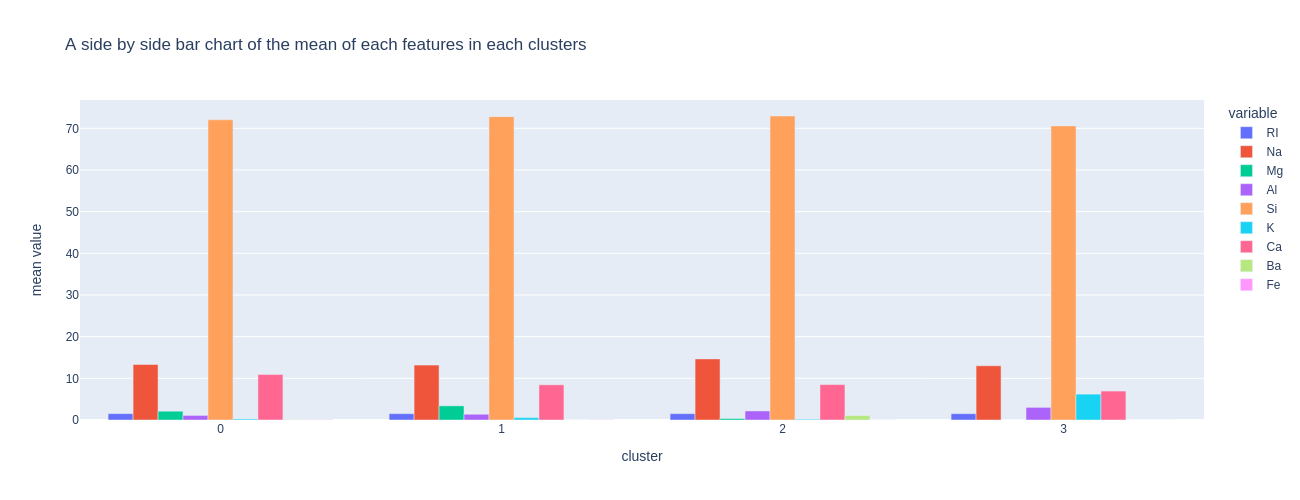

In [31]:
fig = px.bar(clustered_df_4,barmode='group',width=1300,labels={'index':'cluster','value':'mean value'},title='A side by side bar chart of the mean of each features in each clusters')
fig.show('png')

### Kmeans Model with 6 Clusters

In [32]:
final_model_6 = make_pipeline(StandardScaler(),KMeans(n_clusters = 6,random_state=42))
final_model_6.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=6, random_state=42))])

In [33]:
labels_6 = final_model_6.named_steps['kmeans'].labels_
centroid_6 = final_model_6.named_steps['kmeans'].cluster_centers_

In [34]:
clustered_df_6 = X.groupby(labels_6).mean()

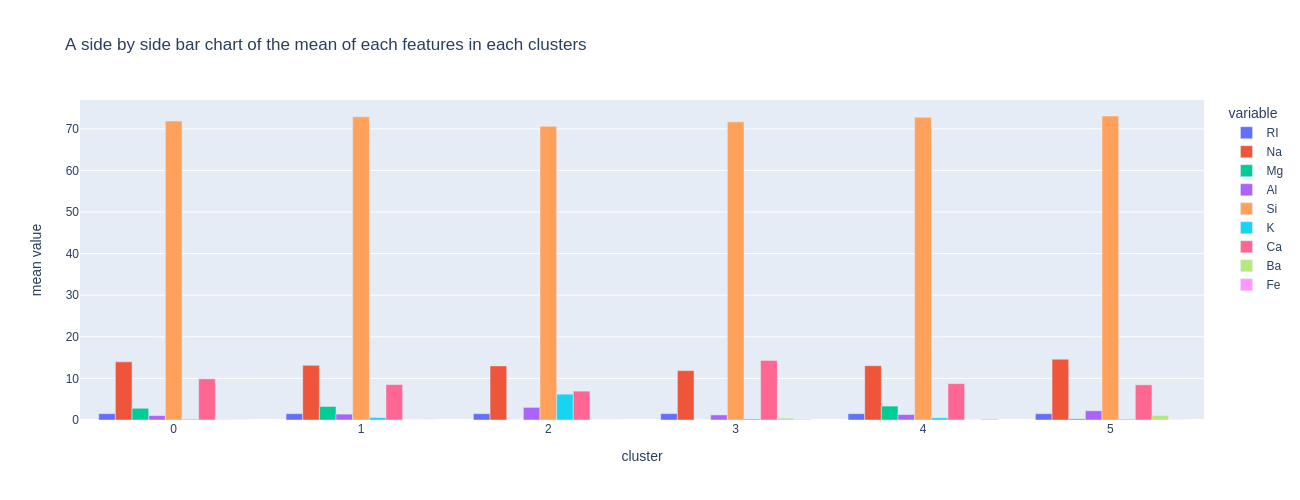

In [35]:
fig = px.bar(clustered_df_6,barmode='group',width=1300,labels={'index':'cluster','value':'mean value'},title='A side by side bar chart of the mean of each features in each clusters')
fig.show('png')

- We reduce the features to 2 so it can be represented on a scatter plot for visualizing the cluster

In [36]:
pca = make_pipeline(StandardScaler(),PCA(n_components=2,random_state=42))
data = pca.fit_transform(X)

In [37]:
clustered_df_pca_4 =  pd.DataFrame(data,columns=['pca1','pca2'])
clustered_df_pca_4['label'] = labels_4

In [38]:
clustered_df_pca_6 = pd.DataFrame(data,columns=['pca1','pca2'])
clustered_df_pca_6['label'] = labels_6

In [39]:
clustered_df_pca_4.head()

,pca1,pca2,label
0,1.151140,-0.529488,1
1,-0.574137,-0.759788,1
2,-0.940160,-0.929836,1
3,-0.142083,-0.961677,1
4,-0.351092,-1.091249,1


In [40]:
clustered_df_pca_6.head()

,pca1,pca2,label
0,1.151140,-0.529488,0
1,-0.574137,-0.759788,1
2,-0.940160,-0.929836,1
3,-0.142083,-0.961677,1
4,-0.351092,-1.091249,1


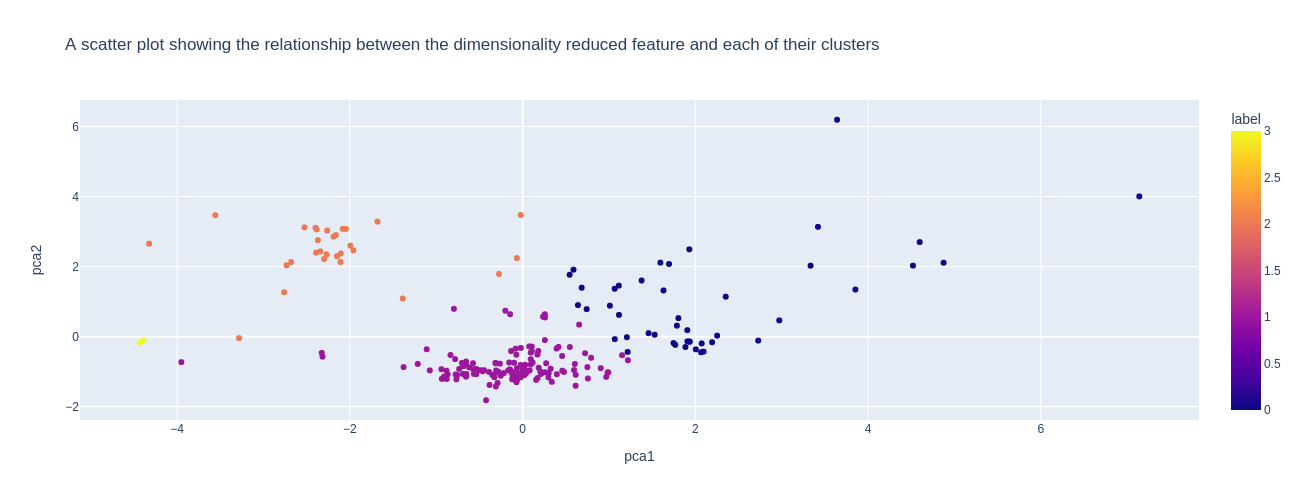

In [41]:
fig = px.scatter(clustered_df_pca_4,x='pca1',y='pca2',color='label',width=1300,title='A scatter plot showing the relationship between the dimensionality reduced feature and each of their clusters')
fig.show('png')

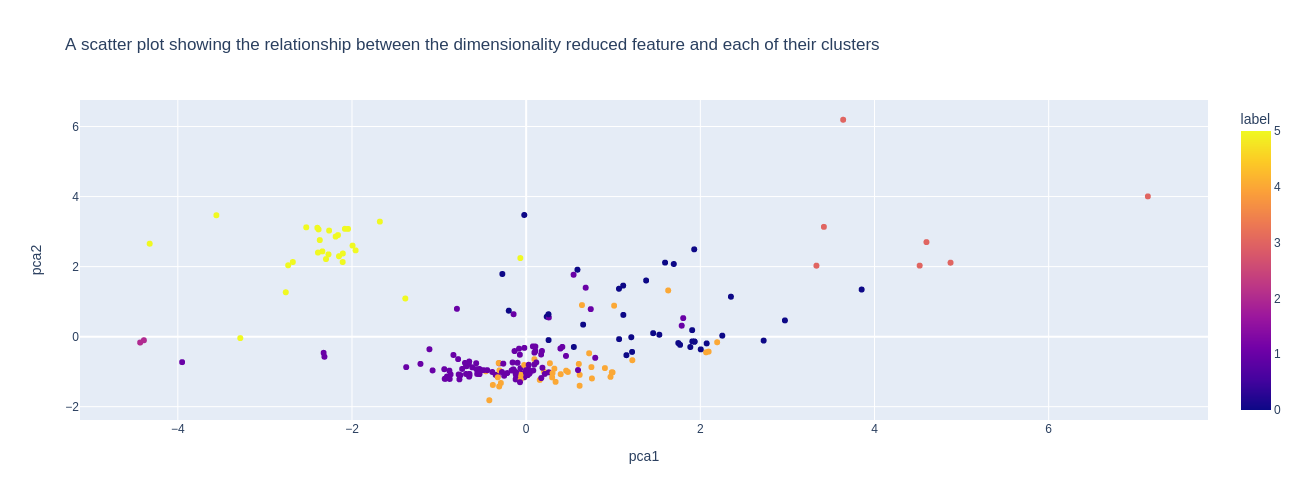

In [42]:
fig = px.scatter(clustered_df_pca_6,x='pca1',y='pca2',color='label',width=1300,title='A scatter plot showing the relationship between the dimensionality reduced feature and each of their clusters')
fig.show('png')